## TP3: Nettoyage et visualisation des données en utilisant l'ACP
### Dataset: Automobile Data
#### Réalisé par: ZARHLOUL Yasser - AISSY Achraf - EL FATHI Zakaria - CHERKAOUI Kamal
#### Encadré par: Prof. OURDOU Amal

## Importation des libraries et lecture des données:

In [110]:
import numpy as np
import pandas as pd

In [111]:
df = pd.read_csv("./input/Automobile_data.csv")
df_price = df[["price"]]    # en guise de visualisation
df = df[["engine-size", "highway-mpg", "horsepower", "curb-weight"]]

## Préparation des données:

In [112]:
df.head()

,engine-size,highway-mpg,horsepower,curb-weight
0,130,27,111,2548
1,130,27,111,2548
2,152,26,154,2823
3,109,30,102,2337
4,136,22,115,2824


In [113]:
df.dtypes

engine-size     int64
highway-mpg     int64
horsepower     object
curb-weight     int64
dtype: object

On remarque que la colonne horsepower contient des valeurs non-numériques. On cherche à rendre cette colonne numérique pour pouvoir appliquer l'ACP.

In [114]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
mean_hp = df['horsepower'].mean()

df_price['price'] = pd.to_numeric(df_price['price'], errors='coerce')
mean_price = df_price['price'].mean()

df['horsepower'] = df['horsepower'].fillna(mean_hp).astype('int64')
df_price['price'] = df_price['price'].fillna(mean_price).astype('int64')

La méthode `to_numeric` avec le paramètre `errors='coerce'` permet de remplacer les entrées non-numériques par une valeur NAN, que l'on remplace par la suite avec la moyenne de la colonne.

In [115]:
df.dtypes

engine-size    int64
highway-mpg    int64
horsepower     int64
curb-weight    int64
dtype: object

## Application de l'ACP:

### Importation des libraries:

In [116]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

### Normalisation des données:

In [117]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [118]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

In [119]:
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

### Affichage du nuage des points:

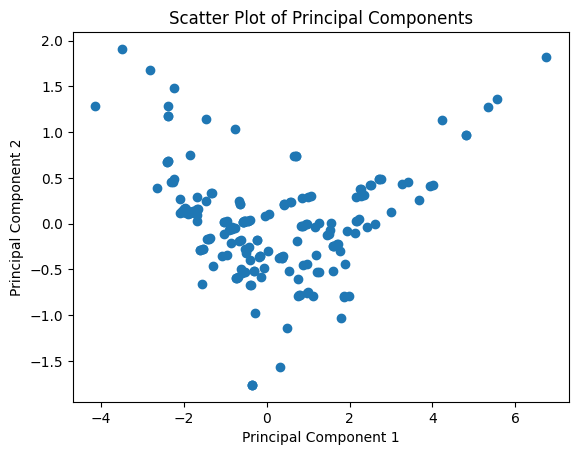

In [120]:
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

### Affichage du nuage des points avec `price` comme *hue*

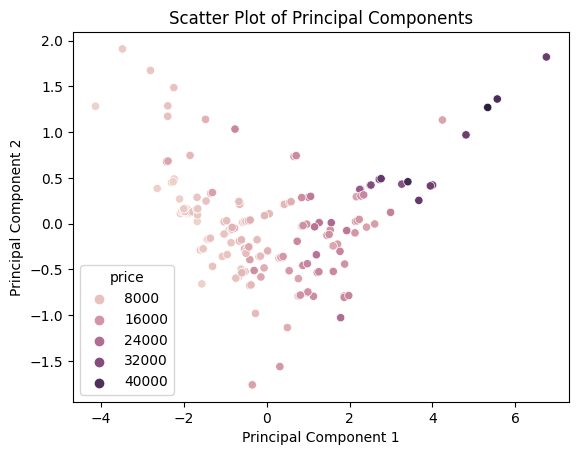

In [121]:
df_pca = pd.DataFrame(data=np.c_[principalComponents, df_price['price']], columns=['PC1', 'PC2', 'price'])

sns.scatterplot(x='PC1', y='PC2', hue='price', data=df_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

### Cercle de corrélation:

In [122]:
from fanalysis.pca import PCA as PCA2
pca2 = PCA2(n_components=2, col_labels=df.columns.values)
pca2.fit_transform(df_scaled)

array([[-3.81140164e-01,  3.71954830e-01],
       [-3.81140164e-01,  3.71954830e-01],
       [-1.53404517e+00,  6.89861058e-02],
       [ 4.06846255e-01,  3.93952197e-01],
       [-1.12994634e+00,  7.94236042e-01],
       [-5.42229602e-01,  5.15162329e-01],
       [-8.73763928e-01,  4.56796536e-01],
       [-9.81979880e-01,  4.37745386e-01],
       [-1.78613627e+00,  1.02806192e+00],
       [-1.86587660e+00,  7.91008127e-01],
       [ 3.03760629e-01,  5.12578238e-01],
       [ 3.03760629e-01,  5.12578238e-01],
       [-1.00751132e+00, -2.89074429e-01],
       [-1.06161929e+00, -2.98600003e-01],
       [-1.55932169e+00, -1.05389492e-02],
       [-3.26183957e+00, -4.32257971e-01],
       [-3.40940678e+00, -4.58236810e-01],
       [-3.67398331e+00, -2.54361303e-01],
       [ 4.13589381e+00, -1.28373814e+00],
       [ 2.41847487e+00, -6.78290785e-01],
       [ 2.38404253e+00, -6.84352514e-01],
       [ 2.30028435e+00, -4.51388169e-01],
       [ 2.08787855e+00, -1.13101358e-01],
       [ 7.

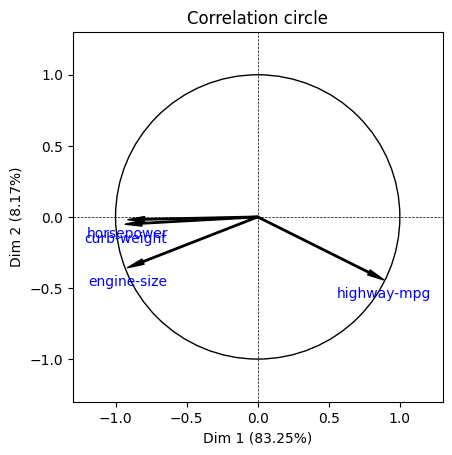

In [123]:
pca2.correlation_circle(num_x_axis=1,num_y_axis=2)

### Calcul de la qualité de la projection:

#### Contribution des 10 premiers individus dans les 2 axes principaux:

In [138]:
pca_r = pca2.row_contrib_

In [139]:
pca_r[:10]

array([[0.02127988, 0.20644136],
       [0.02127988, 0.20644136],
       [0.34472756, 0.00710133],
       [0.02424713, 0.23158123],
       [0.18703175, 0.94127274],
       [0.04306914, 0.39600849],
       [0.11183762, 0.31135934],
       [0.14125534, 0.28592982],
       [0.46733562, 1.57708408],
       [0.50999456, 0.93363729]])

## Interprétation:

On remarque que les deux flèches qui correspondent à `horsepower, curb_weight` sont quasi alignées, et forment un angle très faible. D'où, les deux variables ont une grande correlation (proche de 1). Ces deux colonnes sont négativement corrélées avec la dimension 1, mais n'affecte pas la deuxième dimension.

`highway-mpg` prend une différente direction dans le sens contraire des autres variables, créant une corrélation négative entre `horsepower` et `curb_weight` (proche de -1)

D'autre part, la corrélation entre `highway-mpg` et `engine-size` est un peu faible et est quelque part entre 0 et -0.25.

La fonction `pca.row_contrib_` renvoie un tableau avec les valeurs qui représentent la contribution de chaque individu dans les axes principaux.

Les valeurs les plus élevés pour individu indiquent les axes qui ont le plus contribué à la formation de cet axe.